#### python 编辑图片操作【压缩、截取、添加文字、拼接】
通过PIL的Image,ImageDraw,ImageFont模块，对图片进行如下操作，数据常用图片编辑功能
- 将图片压缩至款1000像素，宽高比不变
- 图片压缩后，在图片中间截取200*200
- 截取后台的图片，底部添加文字 化学01
- 对四张图片进行上面三项操作，以2*2的形式拼接一起

In [ ]:
from PIL import Image,ImageDraw,ImageFont
from pathlib import Path
fontpath = r"C:\Windows\Fonts\msyh.ttc"
typeface = ImageFont.truetype(fontpath, 18)


##### 图片压缩

In [ ]:
im = Image.open('../files/01.png')
# 获取图片尺寸
x,y = im.size
# 对图片进行压缩
im = im.resize((1000,int(y*(1000/x))),Image.ANTIALIAS)
display(im)


##### 图片截取

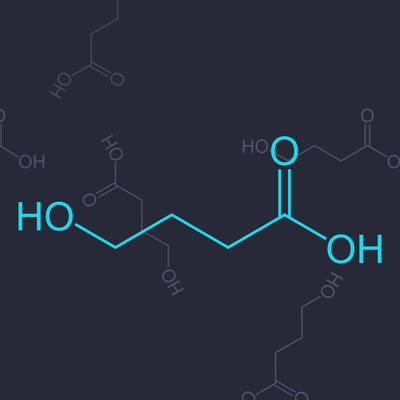

In [83]:
x,y = im.size
# 截取图像（x1,y1,x2,y2）
im = im.crop(((x/2)-200,(y/2)-200,(x/2)+200,(y/2)+200))
display(im)


##### 添加文字

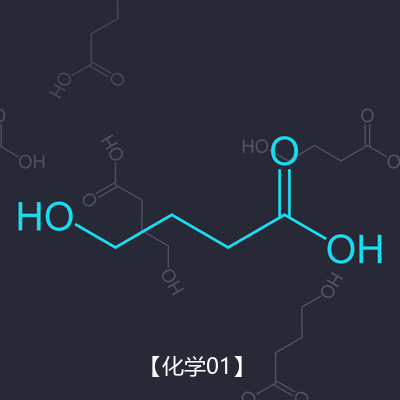

In [84]:
draw = ImageDraw.Draw(im)
# 加载本地字体
fontpath = r"C:\Windows\Fonts\msyh.ttc"
# (字体路径，字体大小)
typeface = ImageFont.truetype(fontpath, 22)
# (文字为知，文字格式，文字颜色)
draw.text((140, 350), "【化学01】",font=typeface, fill=(255,255,255))
display(im)

##### 图片拼接

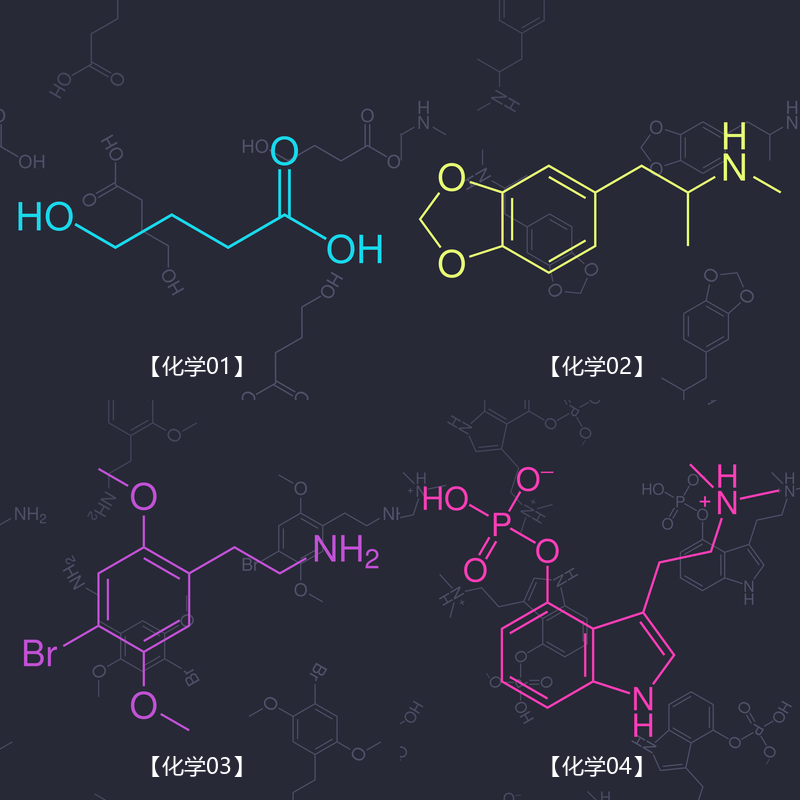

In [94]:
# 设置画布(格式，尺寸，背景色)
image = Image.new('RGB', (800,800), (255,255,255))
typeface = ImageFont.truetype(fontpath, 22)

for i in range(1,5):
    im = Image.open(f'../files/0{i}.png')
    x,y = im.size
    im = im.resize((1000,int(y*(1000/x))),Image.ANTIALIAS)
    x,y = im.size
    im = im.crop(((x/2)-200,(y/2)-200,(x/2)+200,(y/2)+200))
    draw = ImageDraw.Draw(im)
    draw.text((140, 350), f"【化学0{i}】",font=typeface, fill=(255,255,255))
    # display(im)
    if i==1:
        image.paste(im,(0,0))
    elif i==2:
        image.paste(im,(400,0))
    elif i == 3:
        image.paste(im,(0,400))
    elif i == 4:
        image.paste(im,(400,400))
display(image)